Kendra Robbins

# Iterative Solvers lab

In [4]:
import numpy as np
from numpy import linalg as LA
import scipy
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd
import sympy as sy
import math

#### Problem 1

In [44]:
def jacobi(A,b,tol=1e-9,maxiters=500):
    
    #D will be a diagonal matrix with diagonal entries that are the inverses of A's diagonal entries
    D_inv = np.zeros_like(A)
    
    for j in range(np.shape(A)[0]):
        D_inv[j,j]= 1/A[j,j]
        
    dist = 1
    k=0
    x=np.zeros(np.shape(A)[0])
    
    while k<maxiters and dist>tol:
        xnext = x + D_inv@(b-A@x)
        dist = la.norm(x-xnext, np.inf)
        x= xnext 
        k =+1
    
    if k==maxiters:
        print("The function did not converge")
        
    else: 
        return x 
    

In [45]:
def diag_dom(n, num_entries=None):
    '''generates an nxn matrix that will converge with the
    jacobi method'''
    
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

In [46]:
b = np.random.random(6)
A=diag_dom(6)

C=jacobi(A,b)

In [47]:
np.allclose(b,A@C)

True

## Problem 2

In [42]:
def jacobi2(A,b,tol=1e-6,maxiters=500,plot=False):
    
    #D will be a diagonal matrix with diagonal entries that are the inverses of A's diagonal entries
    D_inv = np.zeros_like(A)
    
    for j in range(np.shape(A)[0]):
        D_inv[j,j]= 1/A[j,j]
        
    dist = 1
    k=0
    x=np.zeros(np.shape(A)[0])
    
    #dist_list will hold errors of each approximation
    dist_list = []
        
    while k<maxiters and dist>tol:
        xnext = x + D_inv@(b-A@x)
        dist = la.norm(x-xnext, np.inf)
        dist_list = np.append(dist_list,dist)
        
        x= xnext 
        k =+1
    
    if k==maxiters:
        print("The function did not converge")
        
    else: 
        
        if plot==True:
            D = np.arange(0,len(dist_list))
            plt.semilogy(D, dist_list)
            plt.xlabel('iteration')
            plt.ylabel('absolute error of approximation')
            plt.plot()
        
            return x 
        
        else:
            return x

array([0.21696312, 0.33764237, 0.39995622, 0.54570713, 0.5836116 ,
       0.33531128])

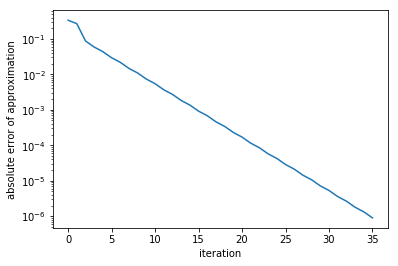

In [43]:
jacobi2(A,b,plot=True)

## Problem 3

In [62]:
def gs(A,b,tol=1e-12, maxiters=500, plot=False):
    
    
    dist = 10
    k=0 #k is number of iterations
    x=np.zeros(np.shape(A)[0])
    
    dist_list = []
    xnext=np.zeros_like(x)
    while k<maxiters and dist>tol:
        
        xcopy=x.copy()
        for i in range(len(x)):
            xnext[i] = xcopy[i]+(b[i] - A[i,:]@xcopy)/A[i,i]
        
        dist = la.norm(xcopy-xnext, np.inf)
        dist_list = np.append(dist_list,dist)
        x = xnext 
        k=+1
    
    if k==maxiters:
        print("The algorithm did not converge")
        
    else: 
        
        if plot==True:
            D = np.arange(0,len(dist_list))
            plt.semilogy(D, dist_list)
            plt.xlabel('iteration')
            plt.ylabel('absolute error of approximation')
            plt.plot()
            
            return x
        
        
        else:
            return x

array([0.45605747, 0.28487501, 0.35276236, 0.06925772, 0.07236727,
       0.00789254])

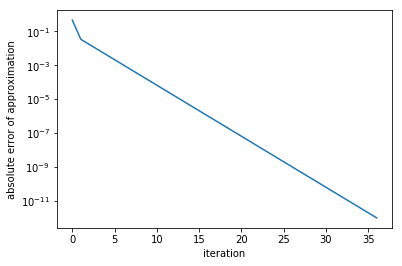

In [63]:
gs(A,b,plot=True)

## Problem 4

In [64]:
def gs_sparse(A,b,tol=1e-12, maxiters=500):
    
    
    dist = 10
    k=0 #k is number of iterations
    x=np.zeros(np.shape(A)[0])
    
    dist_list = []
    xnext=np.zeros_like(x)
    while k<maxiters and dist>tol:
        
        xcopy=x.copy()
        for i in range(len(x)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ xcopy[A.indices[rowstart:rowend]]


            xnext[i] = xcopy[i]+(b[i] - Aix)/A[i,i]
        
        dist = la.norm(xcopy-xnext, np.inf)
        dist_list = np.append(dist_list,dist)
        x = xnext 
        k=+1

    
    if k==maxiters:
        print("The algorithm did not converge")
        
    else: 
        return x

In [65]:
from scipy import sparse
A = sparse.csr_matrix(diag_dom(50000))
b = np.random.random(50000)

gs_sparse(A,b)

array([0.0017464 , 0.00118228, 0.00215158, ..., 0.00186911, 0.00102731,
       0.00053425])

## Problem 5

In [144]:
from numpy import linalg as LA

In [146]:
def gs_relax(A,b,ω,tol=1e-12, maxiters=500):
    
    dist = 10
    k=0 #k is number of iterations
    x=np.zeros(np.shape(A)[0])
    
    dist_list = []
    xnext=np.zeros_like(x)
    while k<maxiters and dist>tol:
        
        xcopy=x.copy()
        for i in range(len(x)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ xcopy[A.indices[rowstart:rowend]]

            xnext[i] = xcopy[i]+ ω*(b[i] - Aix)/A[i,i]
        
        dist = LA.norm(xcopy-xnext)
        dist_list = np.append(dist_list,dist)
        x = xnext 
        k=+1

    
    if k==maxiters:
        print("The algorithm did not converge")
        
    else: 
        return x, k

## Problem 6

In [147]:
def p6(n,ω,tol=1e-8,maxiters=100,plot=False):
    
    #Create B
    ones = np.ones(n-1)
    fours = -4*np.ones(n)
    B = np.diag(fours)
    np.fill_diagonal(B[1:], ones)
    np.fill_diagonal(B[:, 1:], ones)
    
    #Create A
    I = np.eye(n)
    BB = np.eye(n)
    II = np.zeros((n, n))
    np.fill_diagonal(II[1:], ones)
    np.fill_diagonal(II[:, 1:], ones)
    A = np.kron(II, I) + np.kron(BB, B)
    A_use = sparse.csr_matrix(A)
    
    #Create b
    b_tile = np.zeros(n)
    b_tile[0] = -100
    b_tile[n-1] = -100
    b = np.tile(b_tile, n)
    
    x_k, iters = gs_relax(A_use, b, ω, tol, maxiters)
    
    if plot == True:
        x_grid = np.reshape(x_k, (n,n))
        plt.pcolormesh(np.linspace(0, n, n+1), np.linspace(0, n, n+1), x_grid, cmap='coolwarm')
        plt.show()
        
    return iters
  

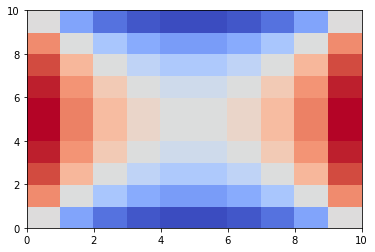

1

In [148]:
p6(10,1,plot=True)

## Problem 7

In [149]:
def p7(n):

    ω_grid = np.arange(1,2,.05)
    
    iters_vec = np.zeros(len(ω_grid))
    
    for i in range(20):
        iters_vec[i] = p6(n,ω_grid[i],1e-2, 1000)
       
        
    plt.plot(np.linspace(1,1.95,len(iters_vec)), iters_vec)
    plt.xlabel("ω")
    plt.ylabel("iterations")
    
    min_iter = np.min(iters_vec)
    
    return min_iter
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


1.0

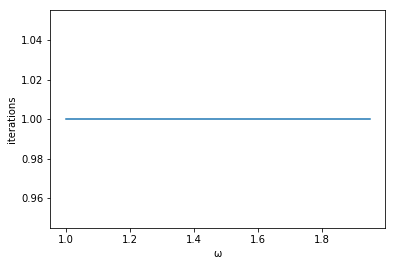

In [150]:
p7(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


1.0

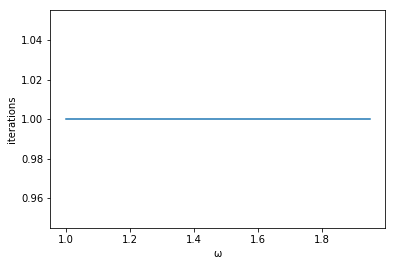

In [152]:
p7(20)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


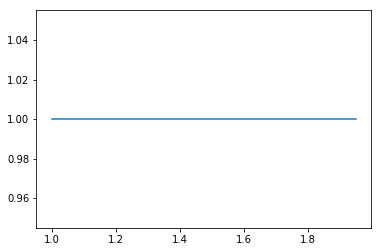

In [153]:
w_7 = np.linspace(1, 1.95, 20)
iterations = np.zeros(20)
for i in range(20):
    iterations[i] = p6(20, w_7[i], tol=1e-2, maxiters = 1000, plot=False)

plt.plot(w_7, iterations)
plt.show()